In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
# Load the data
data_fp = '/uufs/chpc.utah.edu/common/home/u0035056/public_html/monsoon_SW_Utah/data/'
pwat_anl  = pd.read_json(data_fp+'hrrr_PWAT_anl_daily_avg_2023.json', typ='series')
pwat_fcst = pd.read_json(data_fp+'hrrr_PWAT_midnight_fcst_daily_avg_2023.json', typ='series')

cape_anl  = pd.read_json(data_fp+'hrrr_CAPE_anl_daily_max_2023.json', typ='series')
cape_fcst = pd.read_json(data_fp+'hrrr_CAPE_midnight_fcst_daily_max_2023.json', typ='series')

anl_vars_all  = pd.concat({'PWAT': pwat_anl, 'CAPE':  cape_anl}, axis=1)
fcst_vars_all = pd.concat({'PWAT':pwat_fcst, 'CAPE': cape_fcst}, axis=1)

anl_vars_all.reset_index(inplace=True)
anl_vars_all = anl_vars_all.rename(columns = {'index':'DateTime'})
anl_vars_all['Month/Day'] = anl_vars_all['DateTime'].dt.strftime('%m/%d')

fcst_vars_all.reset_index(inplace=True)
fcst_vars_all = fcst_vars_all.rename(columns = {'index':'DateTime'})
fcst_vars_all['Month/Day'] = fcst_vars_all['DateTime'].dt.strftime('%m/%d')

In [23]:
# Normalize the data by teh rough two season average (see thesis for more details)
anl_vars_all['PWAT_norm']  = anl_vars_all['PWAT'] - 1.5 #~ pwat_mean
anl_vars_all['CAPE_norm']  = anl_vars_all['CAPE'] - 500 #~ cape_mean

fcst_vars_all['PWAT_norm'] = fcst_vars_all['PWAT'] - 1.5 #~ pwat_mean
fcst_vars_all['CAPE_norm'] = fcst_vars_all['CAPE'] - 500 #~ cape_mean
anl_vars_all

DateTime      PWAT        CAPE Month/Day  PWAT_norm   CAPE_norm
0  2023-06-01  1.046123  265.455072     06/01  -0.453877 -234.544928
1  2023-06-02  1.421242  574.527536     06/02  -0.078758   74.527536
2  2023-06-03  1.204992  316.087923     06/03  -0.295008 -183.912077
3  2023-06-04  1.248299  278.333333     06/04  -0.251701 -221.666667
4  2023-06-05  1.157553  184.988406     06/05  -0.342447 -315.011594
5  2023-06-06  0.795773  130.711111     06/06  -0.704227 -369.288889
6  2023-06-07  0.733909   68.916908     06/07  -0.766091 -431.083092
7  2023-06-08  0.927878  104.540097     06/08  -0.572122 -395.459903
8  2023-06-09  1.135871  118.455072     06/09  -0.364129 -381.544928
9  2023-06-10  1.033680   64.967150     06/10  -0.466320 -435.032850
10 2023-06-11  0.945768  303.590338     06/11  -0.554232 -196.409662
11 2023-06-12  1.339454  439.785507     06/12  -0.160546  -60.214493
12 2023-06-13  1.067861  215.497585     06/13  -0.432139 -284.502415

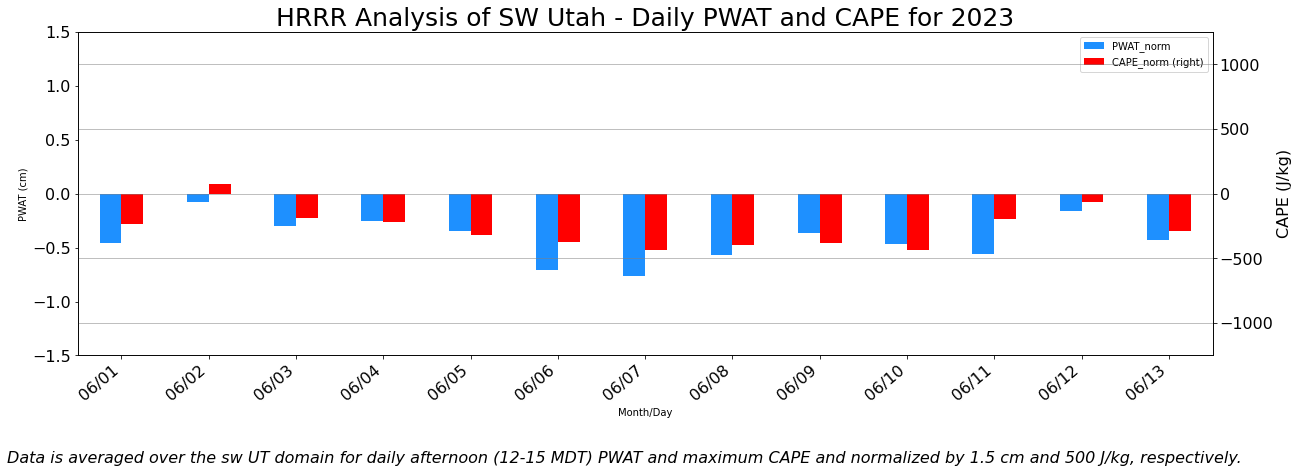

In [72]:
str_year = fcst_vars_all['DateTime'].dt.strftime('%Y')[0]

# Graph up the PWAT and CAPE Anlysis
fig, ax = plt.subplots(facecolor='white')

anl_vars_all.plot(x="Month/Day", y=["PWAT_norm", 'CAPE_norm'],ax=ax,  ylabel='PWAT (cm)',
                ylim =(-1.5,1.5), fontsize=16, secondary_y='CAPE_norm',figsize=(18, 6), kind="bar", color=['dodgerblue', 'red'])

plt.ylabel("CAPE (J/kg)", fontsize=16)
plt.xlabel("Month/Day", fontsize=16)

plt.title("HRRR Analysis of SW Utah - Daily PWAT and CAPE for %s" 
          %(str_year), fontsize=25)
plt.grid( color ='grey', axis='y', linewidth = 0.5)
plt.figtext(0,-.08,'Data is averaged over the sw UT domain for daily afternoon (12-15 MDT) PWAT and maximum CAPE and normalized by 1.5 cm and 500 J/kg, respectively.', fontsize=16, style='italic')
plt.ylim(-1500,1500)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40,ha='right',va='top')
#a = [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % 4 != 0]

plot_file = '/uufs/chpc.utah.edu/common/home/u1269218/public_html/monsoon_SW_Utah/figs/%s_hrrr_anl_monsoon_index.png'
plt.tight_layout()
plt.savefig(plot_file, facecolor=fig.get_facecolor())
plt.show()

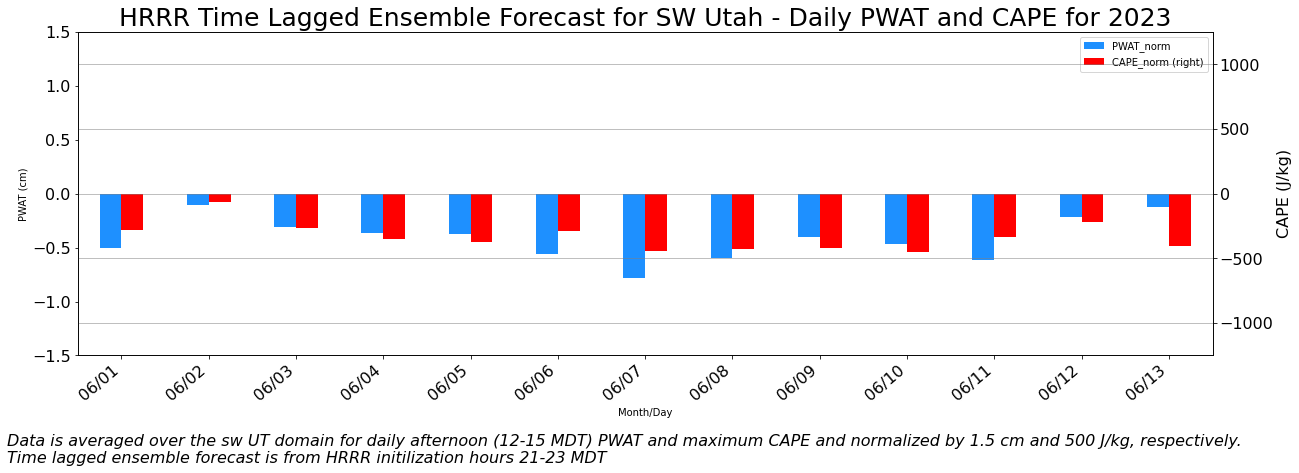

In [74]:
# Graph up the PWAT and CAPE Anlysis
fig, ax = plt.subplots(facecolor='white')

fcst_vars_all.plot(x="Month/Day", y=["PWAT_norm", 'CAPE_norm'],ax=ax,  ylabel='PWAT (cm)',
                ylim =(-1.5,1.5), fontsize=16, secondary_y='CAPE_norm',figsize=(18, 6), kind="bar", color=['dodgerblue', 'red'])

plt.ylabel("CAPE (J/kg)", fontsize=16)
plt.xlabel("Month/Day", fontsize=16)

plt.title("HRRR Time Lagged Ensemble Forecast for SW Utah -\nDaily PWAT and CAPE for %s" 
          %(str_year), fontsize=25)
plt.grid( color ='grey', axis='y', linewidth = 0.5)
plt.figtext(0,-.08,'Data is averaged over the sw UT domain for daily afternoon (12-15 MDT) PWAT and maximum CAPE and normalized by 1.5 cm and 500 J/kg, respectively.\nTime lagged ensemble forecast is from HRRR initilization hours 21-23 MDT', fontsize=16, style='italic')
plt.ylim(-1250,1250)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40,ha='right',va='top')
#a = [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % 4 != 0]

plot_file = '/uufs/chpc.utah.edu/common/home/u1269218/public_html/monsoon_SW_Utah/figs/%s_hrrr_fcst_monsoon_index.png'
plt.tight_layout()
plt.savefig(plot_file, facecolor=fig.get_facecolor())
plt.show()